In [1]:
import pandas as pd
import numpy as np
import igraph.test
from igraph import *
import csv
import numpy as np
import networkx as nx
import operator
import copy
from IPython.core.display import display, SVG
import math
from textblob import TextBlob
import numpy
from matplotlib import pyplot

# #LawyersVsDelhiPolice
209 users <br>
200 tweets over 6 minutes <br>
Thousands of police protested outside police headquarters on to demand action against those who involved in a attack on their colleague outside the Saket Court <br>
Clash over parking dispute<br>


In [2]:
follower_data =  pd.read_csv(r"./Dataset/#LawyersVsDelhiPolice_follower_followee_network.csv", encoding="utf-8")

In [3]:
follower_data['user_id'] = follower_data['user_id'].apply(lambda x:str(x))

In [4]:
tweet_data = pd.read_csv(r"./Dataset/#LawyersVsDelhiPolice_tweets.csv", encoding="utf-8")

In [5]:
unique_uids = follower_data['user_id']

In [6]:
follower_data["followerIDs"] = follower_data["followerIDs"].fillna("")

In [7]:
to_lst = lambda x:np.asarray(x.split(", "))
follower_data["followerIDs_lst"] = follower_data["followerIDs"].apply(to_lst)

In [8]:
common = lambda x:np.intersect1d(x,unique_uids)
follower_data["req_followerIDs_lst"] = follower_data["followerIDs_lst"].apply(common)

In [9]:
tweet_data["retweet_user_id"] = tweet_data["retweet_user_id"].fillna("").apply(lambda x: (x[1:]))

In [10]:
tweet_data["user_id"] = tweet_data["user_id"].fillna("").apply(lambda x: (x[1:]))

In [11]:
follower_edge_list = []
for i in range(len(follower_data)):
    for follower in follower_data["req_followerIDs_lst"][i]:
        follower_edge_list.append((follower,follower_data["user_id"][i]))

In [12]:
follower_followee_graph = igraph.Graph.TupleList(follower_edge_list, directed = True)
follower_followee_graph.deg = [5*i+2 for i in follower_followee_graph.indegree()] 

In [13]:
follower_followee_graph.id = [v["name"] for v in follower_followee_graph.vs]
follower_followee_graph.name_obj = []
for uid in follower_followee_graph.id: 
    follower_followee_graph.name_obj.append(follower_data.loc[follower_data['user_id'] == uid, 'screen_name'])

follower_followee_graph.name = []
for name in follower_followee_graph.name_obj:
    if(name.empty):
        follower_followee_graph.name.append("nan")
    else:
        follower_followee_graph.name.append(name.values[0])

# Follower Followee Network
Nodes are Users<br>
Edge from i to j means i follows j<br>
Main Influencers are the ones with High Degree Centrality.They are AlkaMaverick and maqbool_sm<br>
Size of node in the plot is it's indegree

In [14]:
out = plot(follower_followee_graph,vertex_size=2*follower_followee_graph.deg,vertex_label=follower_followee_graph.name,vertex_label_size=follower_followee_graph.deg)
out.save('Outputs/DS1.1.1.png')

<img src="Outputs/DS1.1.1.png">

In [15]:
community = follower_followee_graph.community_walktrap()

# Communities

Community detection based on random walks<br>
Two main influencers are part of different communities<br>
This is because there are two sides of the case and each of the influencers supports different sides of the case

In [16]:
out = plot(community.as_clustering(),edge_arrow_size=0.6,vertex_label=follower_followee_graph.name,vertex_label_size=follower_followee_graph.deg)
out.save('Outputs/DS1.1.2.png')

<img src="Outputs/DS1.1.2.png">

In [17]:
edge_list_tweets_existing = []
common_users = list(set(unique_uids))
for i in range(len(tweet_data)):
    if tweet_data.iloc[i]["retweet_user_id"] in common_users : edge_list_tweets_existing.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))

In [18]:
Gm = igraph.Graph.TupleList(edge_list_tweets_existing, directed = True)
Gm.deg = [2*i+5 for i in Gm.outdegree()]

In [19]:
Gm.id = [v["name"] for v in Gm.vs]

Gm.name = []
for i in range(len(Gm.id)):
    uid = Gm.id[i]
    name = follower_data.loc[follower_data['user_id'] == uid, 'screen_name']
    if(Gm.deg[i]==0):
        Gm.name.append("")
    elif(name.empty):
        Gm.name.append("nan")
    else:
        Gm.name.append(name.values[0])

# Retweet Network
Nodes are Users<br>
Edge from i to j means i follows j<br>
Most retweeted users are Vishj05 and manakgupta<br>
## Follower followee vs retweet network
The two main influencers tweets aren't the ones which got retweeted maximum<br>
This is because the tweets of Vishj05 and manakgupta are more powerful
## Reachability
Reachability of Vishj05 is same as his out degree, where as for manakgupta, there is one hop of retweet(his retweet is retweeted again)

In [20]:
out = plot(Gm,vertex_label=Gm.name,vertex_size=2*Gm.deg,vertex_label_size=Gm.deg)
out.save("Outputs/DS1.2.png")

<img src="Outputs/DS1.2.png">

In [21]:
tweet_data1 = tweet_data.loc[(tweet_data['created_at'] >= '2019-11-05 17:19:00') & (tweet_data['created_at'] < '2019-11-05 17:21:00')]
tweet_data2 = tweet_data.loc[(tweet_data['created_at'] >= '2019-11-05 17:19:00') & (tweet_data['created_at'] < '2019-11-05 17:23:00')]
tweet_data3 = tweet_data.loc[(tweet_data['created_at'] >= '2019-11-05 17:19:00') & (tweet_data['created_at'] < '2019-11-05 17:25:00')]

In [22]:
edge_list_tweets_1 = []
for i in range(len(tweet_data1)):
    if tweet_data.iloc[i]["retweet_user_id"]!= "" : 
        edge_list_tweets_1.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))

edge_list_tweets_2 = []
for i in range(len(tweet_data2)):
    if tweet_data.iloc[i]["retweet_user_id"]!= "" : 
        edge_list_tweets_2.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))
        
edge_list_tweets_3 = []
for i in range(len(tweet_data3)):
    if tweet_data.iloc[i]["retweet_user_id"]!= "" : 
        edge_list_tweets_3.append((tweet_data.iloc[i]["retweet_user_id"],tweet_data.iloc[i]["user_id"]))
        

In [23]:
retweet_graph_1 = igraph.Graph.TupleList(edge_list_tweets_1, directed = True)
retweet_graph_1.id = [v["name"] for v in retweet_graph_1.vs]
retweet_graph_2 = igraph.Graph.TupleList(edge_list_tweets_2, directed = True)
retweet_graph_2.id = [v["name"] for v in retweet_graph_2.vs]

In [24]:
retweet_graph_3 = igraph.Graph.TupleList(edge_list_tweets_3, directed = True)

retweet_graph_3.id = [v["name"] for v in retweet_graph_3.vs]
col=[]
for i in retweet_graph_3.id:
    if(i in set(retweet_graph_1.id)):
        col.append('red')
    elif(i in set(retweet_graph_2.id)):
        col.append('blue')
    else:
        col.append('green')

# Analysis over time
## Retweet network
First 2 minutes - Red<br>
Next 2 minutes - Blue<br>
Last 2 minutes - Green<br>
## Communities growing over time
The largest commuties are the ones which started in the first 2 minutes

In [25]:
out = plot(retweet_graph_3,vertex_size=10,vertex_color=col,edge_arrow_size=0.65)
out.save('Outputs/DS1.3.png')

<img src="Outputs/DS1.3.png">

In [26]:
required_follower_data = follower_data[follower_data['screen_name']=='AlkaMaverick'] 
required_follower_data1 = follower_data[follower_data['screen_name']=='maqbool_sm'] 
required_follower_data = required_follower_data.append(required_follower_data1)

In [27]:
AlkaMaverick = tweet_data[tweet_data['screen_name']=='AlkaMaverick']['text'].iloc[0]
AlkaMaverick_sentiment = TextBlob(AlkaMaverick).sentiment
AlkaMaverick_followers = follower_data[follower_data['screen_name']=='AlkaMaverick']['req_followerIDs_lst'].iloc[0]
AlkaMaverick_sentiment_lst = []
for i in range(len(AlkaMaverick_followers)):
    txt = tweet_data[tweet_data['user_id']==AlkaMaverick_followers[i]]['text'].iloc[0]
    AlkaMaverick_sentiment_lst.append(TextBlob(txt).sentiment)

In [28]:
maqbool_sm = tweet_data[tweet_data['screen_name']=='maqbool_sm']['text'].iloc[0]
maqbool_sm_sentiment = TextBlob(maqbool_sm).sentiment
maqbool_sm_followers = follower_data[follower_data['screen_name']=='maqbool_sm']['req_followerIDs_lst'].iloc[0]
maqbool_sm_sentiment_lst = []
for i in range(len(maqbool_sm_followers)):
    txt = tweet_data[tweet_data['user_id']==maqbool_sm_followers[i]]['text'].iloc[0]
    maqbool_sm_sentiment_lst.append(TextBlob(txt).sentiment)

# Sentiments of Influencers Vs Propagators
Main Influencers - Alka Maverick and maqbool_sm<br>
## Alka Maverick
Sentiment of all the followers are similar to his sentiment
## maqbool_sm
Sentiment of some of the followers are deviating from his sentiment
## Plot
Y axis - Polarity (-1 very negative to +1 very positive)<br>
Blue line is sentiment of influencer<br>
Red dots are sentiments of propogators<br>

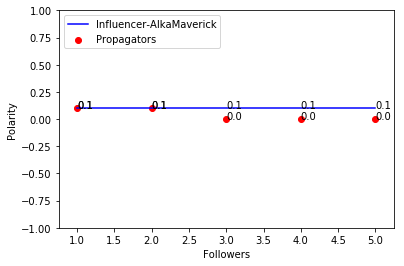

In [29]:
x = numpy.array(range(1,len(AlkaMaverick_sentiment_lst)+1))
y1 = numpy.array([AlkaMaverick_sentiment.polarity]*(len(AlkaMaverick_sentiment_lst)))
y2 = numpy.array([x.polarity for x in AlkaMaverick_sentiment_lst])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(-1,1)
pyplot.xlabel('Followers')
pyplot.ylabel('Polarity')

pyplot.plot(x,y1,label="Influencer-AlkaMaverick",color='b')
for i,j in zip(x,y1):
    ax.annotate(str(j),xy=(i,j))

pyplot.scatter(x,y2,label="Propagators",color='r')
for i,j in zip(x,y2):
    ax.annotate(str(j),xy=(i,j))
    
pyplot.legend(loc="upper left")

pyplot.savefig('Outputs/DS1.4.1.png')

<img src="Outputs/DS1.4.1.png">

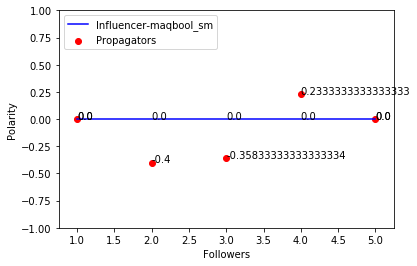

In [30]:
x = numpy.array(range(1,len(maqbool_sm_sentiment_lst)+1))
y1 = numpy.array([maqbool_sm_sentiment.polarity]*(len(maqbool_sm_sentiment_lst)))
y2 = numpy.array([x.polarity for x in maqbool_sm_sentiment_lst])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(-1,1)
pyplot.xlabel('Followers')
pyplot.ylabel('Polarity')

pyplot.plot(x,y1,label="Influencer-maqbool_sm",color='b')
for i,j in zip(x,y1):
    ax.annotate(str(j),xy=(i,j))

pyplot.scatter(x,y2,label="Propagators",color='r')
for i,j in zip(x,y2):
    ax.annotate(str(j),xy=(i,j))
    
pyplot.legend(loc="upper left")

pyplot.savefig('Outputs/DS1.4.2.png')

<img src="Outputs/DS1.4.2.png">